In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
df  = pd.read_csv('../dataset/Linear_regression(Student_marks).csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [40]:
#Getting to know your data

In [41]:
df.shape

(25, 2)

In [42]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [44]:
#Checking for missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [45]:
#Univariate Analysis
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


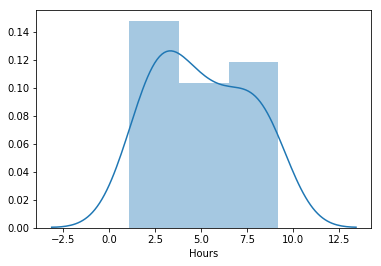

In [46]:
sns.distplot(df['Hours'])

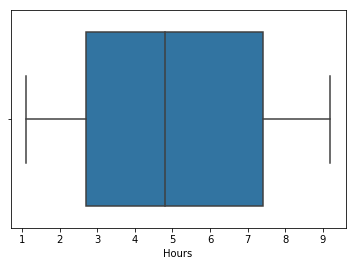

In [47]:
sns.boxplot(df['Hours'])

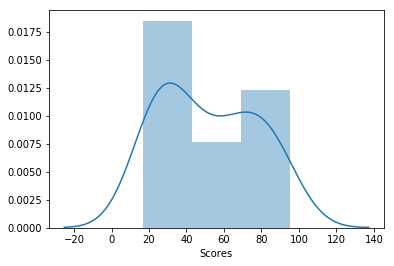

In [48]:
sns.distplot(df['Scores'])

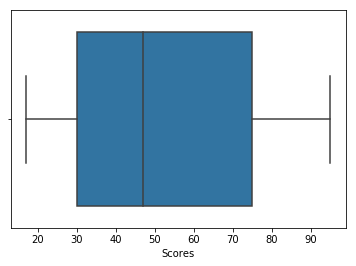

In [49]:
sns.boxplot(df['Scores'])

In [50]:
#Bivariate Analysis

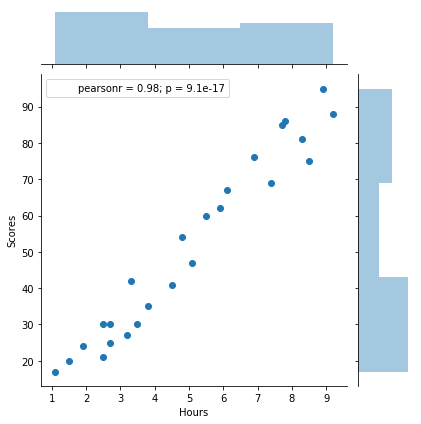

In [51]:
sns.jointplot(x = df['Hours'], y = df['Scores'])

In [62]:
#Preparing dataset
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2)

In [63]:
train_x = train.loc[:, train.columns != "Scores"]
test_x = test.loc[:, test.columns != "Scores"]
train_y = train["Scores"]
test_y = test["Scores"]

In [65]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [73]:
test_pred = model.predict(test_x)

In [78]:
result = pd.DataFrame({'Actual': test_y, 'Predicted': test_pred})
print(result)

    Actual  Predicted
22      35  39.332279
13      42  34.471797
24      86  78.216135
16      30  26.695026
12      41  46.136954


In [81]:
#Computing Mean Squared Error 
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(test_y, test_pred))
print(mean_absolute_error(test_y, test_pred))

34.668435928
5.61725493714


In [82]:
#Computing r2 Score
from sklearn.metrics import r2_score
print(r2_score(test_y, test_pred)*100)

91.3965564999
